# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 4**

**Número do Grupo:**

**Alunos:**
1. Lucas Yuji Matubara

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;
- Aplicação do método PCA utilizando a biblioteca `scikit-learn`.

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **titanic.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.


In [129]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-09-28 18:38:53--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 172.217.218.113, 172.217.218.139, 172.217.218.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ort24f46g8h8nc2sd2ofq25945nfqam/1695926325000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=bf2b4ec1-8393-4c50-b848-c309639c0bf3 [following]
--2023-09-28 18:38:54--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ort24f46g8h8nc2sd2ofq25945nfqam/1695926325000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=bf2b4ec1-8393-4c50-b848-c309639c0bf3
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 108.177.127.132, 

## Dataset **titanic.csv**

---
### Questão 01.

Carregue o dataset **titanic.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [130]:
import numpy as np
import pandas as pd

In [131]:
titanic = pd.read_csv('titanic.csv', na_values = '?')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Notamos que os valores ausentes se apresentam nos atributos de Age e Cabin majoritariamente, e em apenas duas tuplas em Embarked. Ou seja, não sabemos idade de 177 passageiros, não sabemos qual a cabine de 687 passageiros, e não sabemos em qual porto 2 passageiros embarcaram.

---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.


In [133]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **mediana** (`sklearn.impute.SimpleImputer`). Depois, **padronize** as variáveis (`sklearn.preprocessing.StandarScaler`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de **mais frequentes** (`sklearn.impute.SimpleImputer`). Depois, converta os dados categóricos para uma representação numérica, utilizando a codificação **Label Encoding** (`sklearn.preprocessing.LabelEncoder`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [134]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [135]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Notamos que as varaveis faltantes são do 'Age' do tipo numérica, 'Cabin' do tipo categórica, e 'Embarked' do tipo categórica.

In [136]:
categoricas = ['Cabin', 'Embarked']

imputer = SimpleImputer(strategy = 'median')
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

imputer = StandardScaler()
titanic['Age'] = imputer.fit_transform(titanic['Age'].values.reshape(-1, 1))

imputer = SimpleImputer(strategy='most_frequent')
titanic[categoricas] = imputer.fit(titanic[categoricas])

imputer = LabelEncoder()
for col in categoricas:
  titanic[col] = imputer.fit_transform(titanic[col])

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64



---

### Questão 04.

- Separe a variável ``Survived`` do dataframe resultante.

- Para o restante do dataframe, reduza o número de variáveis explicativas para 2 dimensões, utilizando a técnica PCA (`sklearn.decomposition.PCA`).

- Plote um gráfico bidimensional dos pontos após a redução, colorindo cada ponto com o valor do atributo ``Survived``para aquele ponto.

- Discuta a interpretação dos componentes principais.

> **Faça uma cópia do dataframe resultante da questão 03, pois ele será utilizado na próxima questão**

In [137]:
survived = titanic['Survived'].copy()
survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [138]:
titanic.drop(columns = 'Survived', axis=1, inplace = True)
titanic.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,7.2500,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,71.2833,0,0
2,3,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,53.1000,0,0
4,5,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,8.0500,0,0


In [139]:
from sklearn.decomposition import PCA
import seaborn as sns

Como o PCA é uma técnica que foi projetada para lidar com variáveis numéricas contínuas vou criar um dataframe novo apenas com elas para aplicar a transformação.

In [140]:
novo_titanic = titanic[['Age', 'SibSp', 'Parch', 'Fare']].copy()
pca = PCA(n_components=2)
pca.fit(novo_titanic)
pca_titanic = pca.transform(novo_titanic)
novo_titanic.head(3)

,Age,SibSp,Parch,Fare
0,-0.565736,1,0,7.2500
1,0.663861,1,0,71.2833
2,-0.258337,0,0,7.9250


<Axes: xlabel='Componente 1', ylabel='Componente 2'>

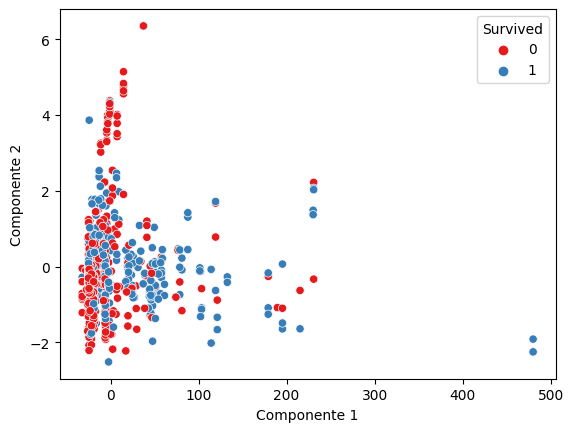

In [141]:
df_pca = pd.DataFrame(data=pca_titanic, columns=['Componente 1', 'Componente 2'])
df_pca = df_pca.join(survived, how='inner')

sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca, hue='Survived', palette='Set1')

Pelo gráfico é difícil de comparar os sobreviventes e os mortos, percebemos que a divisão não é tão clara, eles se misturam bastante, mas generalizando podemos dizer que a concentração de mortos ocorre quando o Componente 1 é menor ou igual a 0. Também notammos que os sobreviventes estão mais dispersos no gráfico.



---

### Questão 05.

**Para o dataframe resultante da questão 03:**
- Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida. Depois apresente os eixos principais.

In [159]:
pca80_titanic = titanic[['Age', 'SibSp', 'Parch', 'Fare']].copy()
pca = PCA(n_components=0.8)
pca.fit(pca80_titanic)
pca80_titanic = pca.transform(pca80_titanic)
pca80_titanic[0]

array([-24.95459977])

In [164]:
pca_80 = pd.DataFrame(data=pca80_titanic, columns=['Componente 1'])
pca_80 = pca_80.join(survived, how='inner')
pca_80

,Componente 1,Survived
0,-24.954600,0
1,39.080176,1
2,-24.282556,1
3,20.896688,1
4,-24.156211,0
...,...,...
886,-19.207479,0
887,-2.208919,1
888,-8.746917,0
889,-2.207872,1


In [165]:
eixos_principais = pca.components_
eixos_principais

array([[0.00194693, 0.00354472, 0.00350849, 0.99998567]])